In [43]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

### 1. Получите и загрузите данные.

In [44]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [45]:
data = data.dropna()

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [47]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [48]:
model.fit(X, y)

LogisticRegression()

In [49]:
predictions = model.predict(X)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predictions)

0.7213114754098361

accuracy_score равна 72%.

In [51]:
from sklearn.metrics import recall_score, precision_score

In [52]:
recall_score(y, predictions)

0.943089430894309

Recall 94% - алгоритм хорошо срабатывает в случае предсказания выживания

In [53]:
precision_score(y, predictions)

0.725

precision_score 72% - алгоритм хуже срабатывает в случае предсказания смерти

### 3. Снова загрузите полные данные

In [54]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

<b> От id не зависит выживаемость.

Pclass оставляем, возможно класс связан с расположением палуб.

<b> Name избавляемся, от имени не зависит выживаемость.

Sex оставляем, можно предположить, что мужчины сильнее, и поэтому спаслись. Или наоборот, спаслись женщины, потому что в первую очередь в спасательные шлюпки сажали женщин с детьми и просто женщин. Но это уже расскажет дальнейший анализ данных.
    
Age оставляем, возраст связан с ценностью жизни (ребёнка будут спасать более вероятно)
    
SibSp оставляем, может, у одиночек была выше реакция, потому что они ни о ком не должны были заботиться, кроме себя.

Parch количество детей/родителей оставляем, возможно, спасали в первую очередь детей.

<b> Ticket удаляем, от номера билета ничего не зависит (по крайней мере в том формате, в котором данные)

Fare оставляем, от стоимости билета (как и от класса) может зависеть доступ к спасательному оборудованию

<b>Cabin каюту выкидываем, она у всех индивидуальная

Embarked оставляем, порт посадки может иметь значение (может посадка в каком-то порту была ранняя, пассажиры из этого порта легли спать раньше и не успели эвакуироваться?)

In [55]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']]
data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,2,23.4500,S
889,1,1,male,26.0,0,30.0000,C


### 5. Проверьте данные на наличие пропущенных значений.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


###### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [57]:
data_no_nan = data.dropna()
data_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [58]:
100 - 100/891*712

20.08978675645342

Будет потеряно 20% данных

###### b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом.

In [59]:
data[data['Age'].isnull() == True]

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
5,0,3,male,NaN,0,8.4583,Q
17,1,2,male,NaN,0,13.0000,S
19,1,3,female,NaN,0,7.2250,C
26,0,3,male,NaN,0,7.2250,C
28,1,3,female,NaN,0,7.8792,Q
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,7.2292,C
863,0,3,female,NaN,2,69.5500,S
868,0,3,male,NaN,0,9.5000,S
878,0,3,male,NaN,0,7.8958,S


In [60]:
min_ = min(data['Age'])
max_ = max(data['Age'])
range_ = max_ - min_
disp = int(data['Age'].var())
mean = data['Age'].mean()
median = data['Age'].median()
mode = int(data['Age'].mode()[0])
print('Age','\n', 'мин:', min_,'\n', 'макс:', max_, '\n', 'размах:', range_, '\n', 'дисперсия:', disp, 
      '\n', 'среднее:', mean,'\n', 'медиана:',median,'\n', 'мода:', mode)

Age 
 мин: 0.42 
 макс: 80.0 
 размах: 79.58 
 дисперсия: 211 
 среднее: 29.69911764705882 
 медиана: 28.0 
 мода: 24


In [61]:
print('средний возраст в зависимости от класса поездки:\n',data.groupby(['Embarked'])['Age'].mean())

средний возраст в зависимости от класса поездки:
 Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64


In [62]:
#заполним возраст средним в зависимости от класса поездки 
#(я бы лучше использовала медиану, но в задании нет такого варианта)
data['Age'] = data['Age'].fillna(data.groupby(['Embarked'])['Age'].transform('median'))
data.head()

C:\Users\Алехандро\AppData\Local\Temp\ipykernel_10348\1017365875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].fillna(data.groupby(['Embarked'])['Age'].transform('median'))


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [63]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    2
dtype: int64

Осталось два пропуска в Embarked

In [64]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Больше всего класса S, заполним пропуски классом S

In [65]:
data['Embarked'].replace(np.nan, 'S', inplace = True)

C:\Users\Алехандро\AppData\Local\Temp\ipykernel_10348\2219261458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'].replace(np.nan, 'S', inplace = True)


In [66]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

Проверим цену:

In [67]:
min_ = min(data['Fare'])
max_ = max(data['Fare'])
range_ = max_ - min_
disp = int(data['Fare'].var())
mean = data['Fare'].mean()
median = data['Fare'].median()
mode = int(data['Fare'].mode()[0])
print('Fare','\n', 'мин:', min_,'\n', 'макс:', max_, '\n', 'размах:', range_, '\n', 'дисперсия:', disp, 
      '\n', 'среднее:', mean,'\n', 'медиана:',median,'\n', 'мода:', mode)

Fare 
 мин: 0.0 
 макс: 512.3292 
 размах: 512.3292 
 дисперсия: 2469 
 среднее: 32.204207968574636 
 медиана: 14.4542 
 мода: 8


Есть билеты за 0, их заменим.

In [69]:
print('Медианная стоимость билета в зависимости от класса поездки:\n',data.groupby(['Embarked'])['Fare'].median())

Медианная стоимость билета в зависимости от класса поездки:
 Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64


In [70]:
#медиана сильно зависит от класса, так и заменим
data['Fare'] = data['Fare'].fillna(data.groupby(['Embarked'])['Fare'].transform('median'))
data.head()

C:\Users\Алехандро\AppData\Local\Temp\ipykernel_10348\4225056164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'] = data['Fare'].fillna(data.groupby(['Embarked'])['Fare'].transform('median'))


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [71]:
min_ = min(data['Fare'])
print('Fare','\n', 'мин:', min_)

Fare 
 мин: 0.0


### 6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [72]:
selectedColumns = data.copy()
X = pd.get_dummies(selectedColumns, columns=['Embarked'])
print('Пометили класс.')
X

Пометили класс.


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,0,7.2500,False,False,True
1,1,1,female,38.0,0,71.2833,True,False,False
2,1,3,female,26.0,0,7.9250,False,False,True
3,1,1,female,35.0,0,53.1000,False,False,True
4,0,3,male,35.0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,False,False,True
887,1,1,female,19.0,0,30.0000,False,False,True
888,0,3,female,28.0,2,23.4500,False,False,True
889,1,1,male,26.0,0,30.0000,True,False,False


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
labelencoder = LabelEncoder()
data_s = labelencoder.fit_transform(data['Sex'].values)
data_s

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [75]:
s = pd.DataFrame()
s['Sex'] = data['Sex']
s['num'] = data_s
s.drop_duplicates(subset='num', keep='first', inplace=False)

,Sex,num
0,male,1
1,female,0


In [76]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['Sex'])
print('Пометили пол.')
X

Пометили пол.


,Survived,Pclass,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,0,7.2500,False,False,True,False,True
1,1,1,38.0,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,7.9250,False,False,True,True,False
3,1,1,35.0,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,False,False,True,False,True
887,1,1,19.0,0,30.0000,False,False,True,True,False
888,0,3,28.0,2,23.4500,False,False,True,True,False
889,1,1,26.0,0,30.0000,True,False,False,False,True


In [77]:
data = X

### 7. Проверьте данные на наличие выбросов.


 <b> Age

In [78]:
#Age -- количественный
iqr = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
lower_bound = data['Age'].quantile(0.25) - 1.5*iqr
upper_bound = data['Age'].quantile(0.75) + 1.5*iqr
outliers = list(filter(lambda x: x < lower_bound or x > upper_bound , data['Age']))
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


Выбросы есть, но все они реалистичны. Ничего не надо удалять.

<b> Fare

In [79]:
#Fare -- количественный
iqr = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
lower_bound = data['Fare'].quantile(0.25) - 1.5*iqr
upper_bound = data['Fare'].quantile(0.75) + 1.5*iqr
outliers = list(filter(lambda x: x < lower_bound or x > upper_bound , data['Fare']))
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


##### a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

Все выбросы в бОльшую сторону выглядят реалистично, на корабле скорее всего были элитные каюты, поэтому я думаю, что их надо  оставить.

### 8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [84]:
import matplotlib.pyplot as plt

(0.0, 400.0)

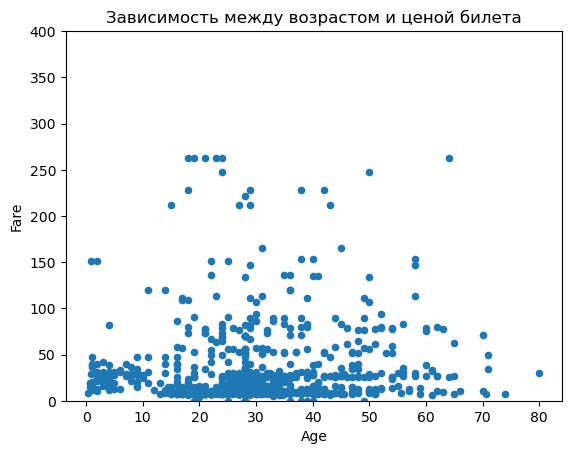

In [85]:
# посмотрим на взаимосвязь возраста и цены билета
data.plot(kind='scatter',
        x='Age',
        y='Fare',
        title='Зависимость между возрастом и ценой билета')
plt.ylim(0, 400)

Вывод: нельзя сказать, что чем старше человек - тем дороже покупает билет

In [88]:
import seaborn as sns

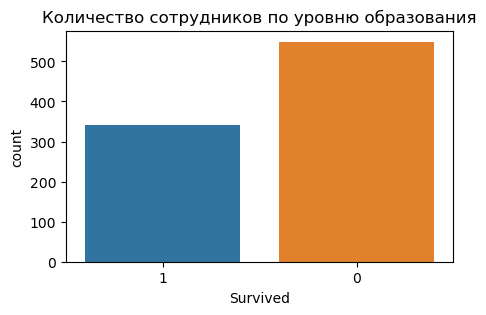

In [90]:
plt.figure(figsize=[5,3])
sns.countplot(data=data, x='Survived', order=[1, 0] )
plt.title('Количество выживших')
plt.show()

Вывод: больше людей умерло.

Примечание, лучше строить графики после обработки пропусков, но до замены значений label encoder или аналогами. После этого строить графики неудобно

### 9. Попробуйте математически преобразовать признак Age.

In [96]:
from sklearn import preprocessing

In [97]:
x_array = np.array(data['Age'])
normalized_arr = preprocessing.normalize([x_array])

print(normalized_arr)

[[0.02295568 0.03965071 0.02712943 0.03652039 0.03652039 0.02817287
  0.05634575 0.00208688 0.02817287 0.01460816 0.00417376 0.06051951
  0.0208688  0.04069415 0.01460816 0.05738919 0.00208688 0.02921631
  0.03234663 0.03025975 0.03652039 0.03547695 0.0156516  0.02921631
  0.00834752 0.03965071 0.03025975 0.01982536 0.02817287 0.02921631
  0.04173759 0.03025975 0.02817287 0.06886703 0.02921631 0.04382447
  0.03025975 0.02191224 0.01878192 0.01460816 0.04173759 0.02817287
  0.03025975 0.00313032 0.01982536 0.02921631 0.02817287 0.02817287
  0.03025975 0.01878192 0.00730408 0.02191224 0.05112855 0.03025975
  0.06782359 0.02921631 0.02191224 0.02973803 0.0052172  0.01147784
  0.02295568 0.03965071 0.04695479 0.00417376 0.03025975 0.03025975
  0.03025975 0.01982536 0.01773848 0.02712943 0.03339007 0.01669504
  0.02191224 0.02712943 0.03339007 0.026086   0.02921631 0.02921631
  0.00086606 0.03130319 0.02295568 0.03025975 0.02817287 0.02921631
  0.01773848 0.03443351 0.01669504 0.02921631 0.

In [100]:
data

,Survived,Pclass,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,0,7.2500,False,False,True,False,True
1,1,1,38.0,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,7.9250,False,False,True,True,False
3,1,1,35.0,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,False,False,True,False,True
887,1,1,19.0,0,30.0000,False,False,True,True,False
888,0,3,28.0,2,23.4500,False,False,True,True,False
889,1,1,26.0,0,30.0000,True,False,False,False,True


In [103]:
data['Age'] = normalized_arr[0].tolist()
data

,Survived,Pclass,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,0.022956,0,7.2500,False,False,True,False,True
1,1,1,0.039651,0,71.2833,True,False,False,True,False
2,1,3,0.027129,0,7.9250,False,False,True,True,False
3,1,1,0.036520,0,53.1000,False,False,True,True,False
4,0,3,0.036520,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.028173,0,13.0000,False,False,True,False,True
887,1,1,0.019825,0,30.0000,False,False,True,True,False
888,0,3,0.029216,2,23.4500,False,False,True,True,False
889,1,1,0.027129,0,30.0000,True,False,False,False,True


### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [104]:
X = data[['Pclass', 'Age', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']]
y = data['Survived']

In [105]:
model.fit(X, y)

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
predictions = model.predict(X)

In [107]:
accuracy_score(y, predictions)

0.7890011223344556

accuracy_score равна 79%, мы улучшили результат

In [108]:
recall_score(y, predictions)

0.7017543859649122

Recall 70% - алгоритм стал хуже срабатывать в случае предсказания выживания

In [109]:
precision_score(y, predictions)

0.7361963190184049

precision_score 74% - незначительно улучшили результат в случае предсказания смерти. но прогнозировать смерть людей в катастрофе важнее, чем их выживание

### 11. Сформулируйте выводы по проделанной работе.

###### a) Кратко опишите какие преобразования были сделаны и почему.

Были удалены признаки, не влияющие на построение модели. Это id, name, ticket и cabin.

У оставшихся данных заполнены пропуски: 
- возраст заполнен средним в зависимости от класса поездки
- класс каюты заполнен классом S (таких кают на корабле было больше всего)
- цена, которая была равна 0, заполнена медианой в зависимости от класса поездки

Категориальные переменные Sex и Embarked переведены в булевый тип, созданы дополнительные столбцы для каждого уникального значения. Использован модуль get_dummies для Embarked и LabelEncoder для Sex.

Нормализован столбец Age. Это нужно для выравнивания данных, чтобы не так значителен был числовой разрыв между ним (улучшает качество модели)

###### b) Сравните метрики моделей из п. 2 и п. 10.

Во 2 пункте получилось:
- accuracy_score равный 72.1%
- recall_score равный 94.3%
- presicion_score 72.5%

После работы с данными, в 10 пункте:
- accuracy_score равный 78.9%
- recall_score равный 70.1%
- precision_score равный 73.6%

accuracy_score увеличился на 6.8%, recall_score уменьшился на 24.2%, precision_score увеличился на 1.1%

###### c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. 

Без понимания данных, по которым строится модель, с меньшей вероятностью получится создать модель высокого качества.

Всегда нужно исследовать данные.

При большом количестве пропусков в данных пропуска надо обрабатывать, а не удалять. По разному надо обрабатывать количественные и качественные значения, и надо понимать, что сами пропуски в данных тоже могут быть важным признаком.

###### *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Да, но чем меньше данные, тем более тщательно надо производить обработку, так как в маленьких данных важны каждая строка. В больших данных многими пропусками можно пренебречь и удалить строки целиком. Но даже в больших данных надо смотреть на признак, и что он значит (как минимум, в некоторых случаях само наличие пропуска может говорить о чем-то важном)